# Implementing SVM#

In [155]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [148]:
plt.style.use('ggplot')

In [149]:
data = pd.read_csv('../Data/reddit_training.csv')

In [150]:
data.head()

,index,body,author,created_utc,subreddit_id,link_id,parent_id,score,id,subreddit,sarcasm_tag
0,954,"That video was NOT the actual jokes, which dis...",SnoopyFandango,1441133826,t5_2qh6e,t3_3j9177,t3_3j9177,16,cunauaf,television,no
1,957,I wash shocked to realize that the actual foot...,mortal_cum_bat,1441135440,t5_2qh6e,t3_3j9177,t1_cunauaf,3,cunbw3h,television,no
2,956,I could have sworn I saw it a few months ago. ...,HolidayInnCambodia,1441136214,t5_2qh6e,t3_3j9177,t1_cunbw3h,4,cunceo7,television,no
3,958,Penn and Tellers BS has Gottfried on telling t...,hereticsmurf,1441138662,t5_2qh6e,t3_3j9177,t3_3j9177,2,cune0yw,television,no
4,959,Wasn't the whole bit in the Aristocrats docume...,jbiresq,1441143930,t5_2qh6e,t3_3j9177,t3_3j9177,2,cunhg2v,television,no


In [151]:
tfid = TfidfVectorizer(stop_words=stopwords.words('english'), token_pattern=r'[%s]+' % string.ascii_letters)

In [152]:
tf_idf_array = tfid.fit_transform(data['body']).toarray()

In [153]:
tf_idf_array = pd.DataFrame(data=tf_idf_array, columns=tfid.get_feature_names())

In [154]:
tf_idf_array.head()

,aaaaaaiiiiiiiii,aaand,aaawwww,aang,aaron,abandoned,abbout,abc,abduction,abilities,...,zap,zbzct,zenith,zero,zippity,zoey,zombie,zone,zoo,zucluyhxsec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
pca = PCA(n_components=2).fit(tf_idf_array)

In [157]:
data2d = pca.transform(tf_idf_array)

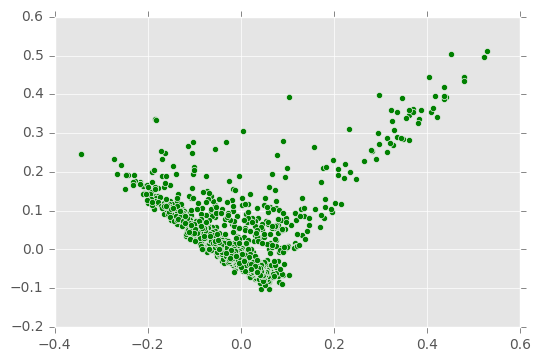

In [163]:
plt.scatter(data2d[:, 0], data2d[:, 1], c='g')